In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import cv2


In [2]:
def load_data(path_data):
    def load_file_from_folder(folder_name):
        X, y = [], []
        for folder in os.listdir(folder_name):
            folder_path = os.path.join(folder_name, folder)
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                try:
                    image = cv2.imread(file_path)
                    if image is not None:
                        X.append(image)
                        y.append(folder)
                except Exception as e:
                    print(e)
        return X, y
    X_train, y_train = load_file_from_folder(path_data + '/' + 'Train')
    X_test, y_test = load_file_from_folder(path_data + '/' + 'Test')
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

path_data = os.getcwd() # current directory
X_train,y_train, X_test, y_test = load_data(path_data)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2855, 100, 100, 3) (2855,) (954, 100, 100, 3) (954,)


In [ ]:
print(np.unique(y_train))

['Apple Braeburn' 'Avocado' 'Banana' 'Orange' 'Strawberry' 'Watermelon']


In [3]:
# Encoding label 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
print(y_train)

[0 0 0 ... 5 5 5]


In [ ]:
y_test = le.transform(y_test)

In [4]:
print(le.inverse_transform([0, 1, 2, 3, 4, 5])) 



['Apple Braeburn' 'Avocado' 'Banana' 'Orange' 'Strawberry' 'Watermelon']


In [ ]:
# One hot encoding label (Y)
from keras.utils import np_utils
print('Dữ liệu y ban đầu ', y_train[0])
y_train = np_utils.to_categorical(y_train, 6)
y_test = np_utils.to_categorical(y_test, 6)
print('Dữ liệu y sau one-hot encoding ',y_train[0])

Dữ liệu y ban đầu  0
Dữ liệu y sau one-hot encoding  [1. 0. 0. 0. 0. 0.]


In [ ]:
# save numpy array, train model with colab ... 
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [3]:
# load numpy array from npy file

# load array
X_train = np.load('/content/drive/MyDrive/Colab Notebooks/fruit_classification/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/fruit_classification/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/fruit_classification/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/fruit_classification/y_test.npy')
# print the array
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2855, 100, 100, 3) (954, 100, 100, 3) (2855, 6) (954, 6)


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(16, (5,5), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 64)        

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test))


Epoch 1/30
90/90 [==============================] - 2s 14ms/step - loss: 0.6978 - accuracy: 0.8781 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 2/30
90/90 [==============================] - 1s 11ms/step - loss: 0.0777 - accuracy: 0.9814 - val_loss: 0.0417 - val_accuracy: 0.9811
Epoch 3/30
90/90 [==============================] - 1s 11ms/step - loss: 1.2538e-04 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 0.9864
Epoch 4/30
90/90 [==============================] - 1s 13ms/step - loss: 4.3366e-05 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9864
Epoch 5/30
90/90 [==============================] - 1s 11ms/step - loss: 2.9441e-05 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9874
Epoch 6/30
90/90 [==============================] - 1s 11ms/step - loss: 1.9181e-05 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9885
Epoch 7/30
90/90 [==============================] - 1s 11ms/step - loss: 1.5437e-05 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 

30/30 - 0s - loss: 0.0293 - accuracy: 0.9874 - 186ms/epoch - 6ms/step


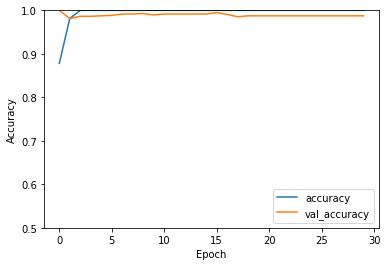

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [13]:
y_predict = model.predict(X_test[0].reshape(1,100,100,3))
print('Giá trị dự đoán: ', np.argmax(y_predict))

Giá trị dự đoán:  0


In [14]:
print(y_test[0])

[1. 0. 0. 0. 0. 0.]


In [18]:
model.save('my_model_weights.h5')

In [19]:
from keras.models import load_model
new_model = load_model('my_model_weights.h5')

In [20]:
y_predict = new_model.predict(X_test[0].reshape(1,100,100,3))
print('Giá trị dự đoán: ', np.argmax(y_predict))

Giá trị dự đoán:  0
